In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
# Read the data

pwd = os.getcwd()

data_import = pd.read_csv(pwd + "\\Titanic.csv")
data_import

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Look at the data types 

data_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Check numeric columns

data_import.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Inspect categorical columns

categorical = data_import.dtypes[data_import.dtypes == "object"].index
print(categorical)

data_import[categorical].describe()

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
# Remove uneeded rows for prediction

data_import = data_import.copy()

data_import.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True)

In [7]:
data_import["Cabin"][0:15]

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
Name: Cabin, dtype: object

In [8]:
# Could use Cabin class to predict later

data_import["Cabin"].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [9]:
# Transform "Survived" column to better represent our categories
# Transform 0,1 to "Died,Survived"

new_survived = pd.Categorical(data_import["Survived"])
new_survived = new_survived.rename_categories(["Died", "Survived"])

new_survived.describe()

data_import["Survived"] = new_survived

In [10]:
data_import

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Died,3,male,22.0,1,0,7.2500,NaN,S
1,Survived,1,female,38.0,1,0,71.2833,C85,C
2,Survived,3,female,26.0,0,0,7.9250,NaN,S
3,Survived,1,female,35.0,1,0,53.1000,C123,S
4,Died,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,Died,2,male,27.0,0,0,13.0000,NaN,S
887,Survived,1,female,19.0,0,0,30.0000,B42,S
888,Died,3,female,NaN,1,2,23.4500,NaN,S
889,Survived,1,male,26.0,0,0,30.0000,C148,C


In [11]:
# Transform Pclass variable into ordered variable
# Class1 is First Class

new_pclass = pd.Categorical(data_import["Pclass"],
ordered=True)

new_pclass = new_pclass.rename_categories(["Class1", "Class2", "Class3"])

new_pclass.describe()

data_import["Pclass"] = new_pclass

In [12]:
# Check unique cabins

data_import["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
# Extract first letter of the cabin number to create a new categorical variable

char_cabin = data_import["Cabin"].astype(str) # Convert to string

new_cabin = np.array([cabin[0] for cabin in char_cabin]) #Take first letter

new_cabin = pd.Categorical(new_cabin) # Transform to categorical

new_cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [14]:
data_import["Cabin"] = new_cabin

In [15]:
# Age had a smaller count than our total data

data_import["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [16]:
# Find passengers with missing age
 
missing = np.where(data_import["Age"].isnull() == True)
missing

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

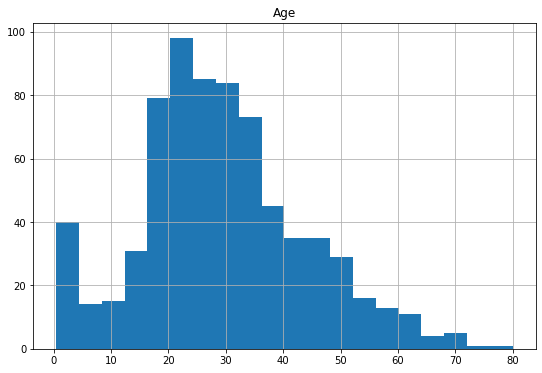

In [17]:
# A lot of values are missing (177)
# We can look at the age distribution to see how we could possibly impute new values

data_import.hist(column ='Age',
                 figsize = (9,6),
                 bins = 20)

In [18]:
# Age distribution is fairly normal
# Use median age as new age value for missing age values
# We'll use 28 as the median was 29.6, but we a slightly high concentration of passengers ages 0-5

new_age_var = np.where(data_import["Age"].isnull(),
            28,
            data_import["Age"])

data_import["Age"] = new_age_var

data_import

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,Died,Class3,male,22.0,1,0,7.2500,n,S
1,Survived,Class1,female,38.0,1,0,71.2833,C,C
2,Survived,Class3,female,26.0,0,0,7.9250,n,S
3,Survived,Class1,female,35.0,1,0,53.1000,C,S
4,Died,Class3,male,35.0,0,0,8.0500,n,S
...,...,...,...,...,...,...,...,...,...
886,Died,Class2,male,27.0,0,0,13.0000,n,S
887,Survived,Class1,female,19.0,0,0,30.0000,B,S
888,Died,Class3,female,28.0,1,2,23.4500,n,S
889,Survived,Class1,male,26.0,0,0,30.0000,C,C


In [19]:
# Check outliers
# Transform data for boxplot

data_numeric = data_import.select_dtypes(include='number')
print(data_numeric)

data_numeric = pd.melt(data_numeric)
data_numeric


      Age  SibSp  Parch     Fare
0    22.0      1      0   7.2500
1    38.0      1      0  71.2833
2    26.0      0      0   7.9250
3    35.0      1      0  53.1000
4    35.0      0      0   8.0500
..    ...    ...    ...      ...
886  27.0      0      0  13.0000
887  19.0      0      0  30.0000
888  28.0      1      2  23.4500
889  26.0      0      0  30.0000
890  32.0      0      0   7.7500

[891 rows x 4 columns]


,variable,value
0,Age,22.00
1,Age,38.00
2,Age,26.00
3,Age,35.00
4,Age,35.00
...,...,...
3559,Fare,13.00
3560,Fare,30.00
3561,Fare,23.45
3562,Fare,30.00


<AxesSubplot:xlabel='variable', ylabel='value'>

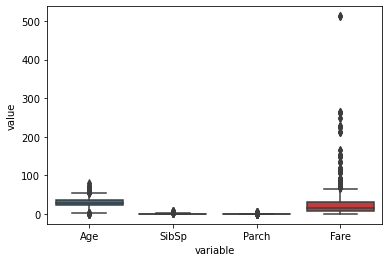

In [20]:
# Boxplot to check variables 

sns.boxplot(x='variable', y='value', data=data_numeric)

<AxesSubplot:>

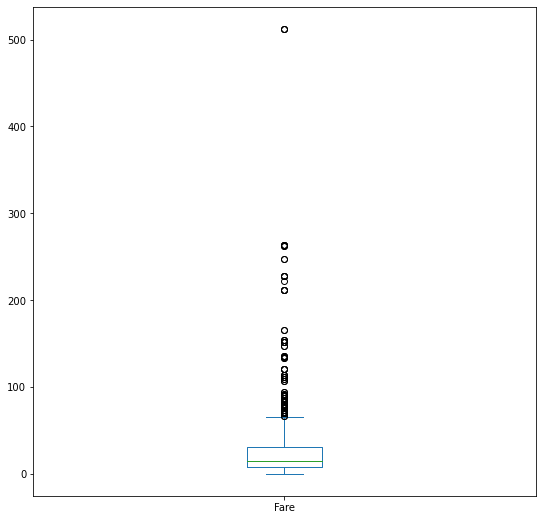

In [21]:
# Fare has the most outliers
# We will keep the outliers in, but keep in mind 

data_import["Fare"].plot(kind="box",
                        figsize=(9,9))

In [22]:
# Look at creating new variables if needed
# Create a new family variable to combine siblings plus parent count

data_import["Family"] = data_import["SibSp"] + data_import["Parch"]

In [25]:
# View final dataset

data_import

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Family
0,Died,Class3,male,22.0,1,0,7.2500,n,S,1
1,Survived,Class1,female,38.0,1,0,71.2833,C,C,1
2,Survived,Class3,female,26.0,0,0,7.9250,n,S,0
3,Survived,Class1,female,35.0,1,0,53.1000,C,S,1
4,Died,Class3,male,35.0,0,0,8.0500,n,S,0
...,...,...,...,...,...,...,...,...,...,...
886,Died,Class2,male,27.0,0,0,13.0000,n,S,0
887,Survived,Class1,female,19.0,0,0,30.0000,B,S,0
888,Died,Class3,female,28.0,1,2,23.4500,n,S,3
889,Survived,Class1,male,26.0,0,0,30.0000,C,C,0


In [24]:
# Final cleaned dataset to excel

data_import.to_excel('TitanicData_Cleaned.xlsx', sheet_name="Passenger_Data", index=False)